# TEAM 3 BIG DATA PROJECT

### GROUP MEMBERS:
1. Charles Nana Kwakye - r0879035
2. Emmanuel Akpandara - r0879038
3. Arthur Birate Kabanza - r0889635

### PROJECT DESCRIPTION:
The goal of our Big Data project is to develop an image classification app and an NLP app integrated into Streamlit. The primary focus for the first part of the project will be on classifying images related to 5 different Seabirds, Additionally, we will tackle the toxic comment dataset from Kaggle using a Transformer model for the NLP aspect in the second part of this project.

### Part A: Image Classification
#### A.1 Selecting the Dataset

We built a scraper on python which we used to scrape 5 classes of sea birds which are ducks, geese, pelicans, penguins and storks.
We conducted an exploratory data analysis on the dataset to ensure quality images and equal number of images per class for training.

#### A.2 Modelling Using Fastai


##### A.2.1
In this part a data loader template is made and we used our dataset on it. We were able to create our first Model with finetuning and later shoing the loss to learning rate graph, confusion matrix, training/validation plot and and some inferences to images it hasn't seen before.


##### A.2.2
Our second Model was tweaked with mixed precision training, additional data augumentation, explicit application of transforms after batch processing and a more extended fine-tuning process. This resulted in better results on the graphs, some inferencing was also done as well.

##### A.2.3

We also trained our dataset on Google's Teachable machine and some inferencing was done as well.


#### A.3 Deployment on Streamlit
A functionality was implemented to test the presaved model wich allowed users to upload images for classification.
Additionally, we created an API endpoint around the model using FastAPI.

### Part B: Natural Language Processing:
#### B.1
Toxic dataset EDA
#### B.2
Text Preprocessing and Model Training



# **Part A: Image Classification**

## A.1 Selecting the Dataset

### Sea Bird Scraper

In [ ]:
import requests
from bs4 import BeautifulSoup
import os

The function builds URLs from a base URL, prefix, and page number by iterating through a range of given pages. After that, it makes HTTP calls to these URLs in order to obtain HTML content and, if nothing is currently available, construct output folders for each page. It parses the HTML, locates the main image container using BeautifulSoup, and finds image elements according to specified criteria. It retrieves the material from the source URL, modifies the format, and extracts each image. With filenames based on custom data, page number, and image index, the downloaded photos are saved in an output folder.








In [48]:
!unzip SeaBirds.zip

Archive:  SeaBirds.zip
   creating: SeaBirds/ducks/
  inflating: SeaBirds/ducks/duck1_0.jpeg  
  inflating: SeaBirds/ducks/duck1_1.jpeg  
  inflating: SeaBirds/ducks/duck1_10.jpeg  
  inflating: SeaBirds/ducks/duck1_11.jpeg  
  inflating: SeaBirds/ducks/duck1_12.jpeg  
  inflating: SeaBirds/ducks/duck1_13.jpeg  
  inflating: SeaBirds/ducks/duck1_14.jpeg  
  inflating: SeaBirds/ducks/duck1_15.jpeg  
  inflating: SeaBirds/ducks/duck1_16.jpeg  
  inflating: SeaBirds/ducks/duck1_17.jpeg  
  inflating: SeaBirds/ducks/duck1_18.jpeg  
  inflating: SeaBirds/ducks/duck1_19.jpeg  
  inflating: SeaBirds/ducks/duck1_2.jpeg  
  inflating: SeaBirds/ducks/duck1_20.jpeg  
  inflating: SeaBirds/ducks/duck1_21.jpeg  
  inflating: SeaBirds/ducks/duck1_22.jpeg  
  inflating: SeaBirds/ducks/duck1_23.jpeg  
  inflating: SeaBirds/ducks/duck1_24.jpeg  
  inflating: SeaBirds/ducks/duck1_25.jpeg  
  inflating: SeaBirds/ducks/duck1_26.jpeg  
  inflating: SeaBirds/ducks/duck1_27.jpeg  
  inflating: SeaBirds/ducks

In [49]:
def image_scrapper(base_url,limit_page=None, prefix=None ,primary_html_tag=None, primary_selector=None, primary_class_name=None,
                   secondary_html_tag=None, secondary_selector=None,
                   secondary_class_name=None,output_folder=None, custom_data=None, max_counter=None):


    for number_page in range(1,limit_page):

        url=f"{base_url}{prefix}page={number_page}"

        get_sites = requests.get(url)

        # print(get_sites)


        if not os.path.exists(output_folder):
            os.mkdir(output_folder)

        soup = BeautifulSoup(get_sites.content, 'html.parser')

        get_container = soup.find(primary_html_tag,{primary_selector:primary_class_name})

        get_images_tags =  get_container.find_all(secondary_html_tag,{secondary_selector:secondary_class_name})

        # print(get_container)
        images = []
        images.append(len(get_images_tags))
        print(len(get_images_tags))


        for i, image in  enumerate(get_images_tags):

                img = image["src"]

                part = img.split('.svg')[0]

                format_img = "{}.jpeg".format(part)
                flag = requests.get(format_img)
                with open(f"{output_folder}/{custom_data}{number_page}_{i}.jpeg", 'ab') as file:
                    file.write(flag.content)


We then use a custom image scraper function to scrape pelican photos from the given vista.com URL. It sets the output folder data, HTML tags, selectors, pagination limit, and URL prefix. The output folder and custom data are configured especially for pictures of our pelicans. The image scraping is then carried out by invoking the function image_scrapper

In [ ]:
## Scrapping images of pelicans from vista.com
site_url = "https://create.vista.com/photos/pelicans/"
limit_page = 5
prefix = "?"
primary_html_tag = "div"
primary_selector = "class"
primary_class_name = "assetsListWrapper-oDy7b"
secondary_html_tag="img"
secondary_selector="class"
secondary_class_name="media-3IiMe"
output_folder="pelicans"
custom_data="pelican"



pelicans = image_scrapper(site_url ,limit_page,prefix,primary_html_tag,primary_selector,primary_class_name,
             secondary_html_tag ,secondary_selector,secondary_class_name,output_folder,custom_data)

The same is then repeated for the remaining sea birds we want to classify

In [ ]:
## Scrapping images of ducks from vista.com
site_url = "https://create.vista.com/photos/ducks/"
limit_page = 6
prefix = "?"
primary_html_tag = "div"
primary_selector = "class"
primary_class_name = "assetsListWrapper-oDy7b"
secondary_html_tag="img"
secondary_selector="class"
secondary_class_name="media-3IiMe"
output_folder="ducks"
custom_data="duck"



ducks = image_scrapper(site_url ,limit_page,prefix,primary_html_tag,primary_selector,primary_class_name,
             secondary_html_tag ,secondary_selector,secondary_class_name,output_folder,custom_data)

In [ ]:
## Scrapping images of ducks from vista.com
site_url = "https://create.vista.com/photos/geese/"
limit_page = 6
prefix = "?"
primary_html_tag = "div"
primary_selector = "class"
primary_class_name = "assetsListWrapper-oDy7b"
secondary_html_tag="img"
secondary_selector="class"
secondary_class_name="media-3IiMe"
output_folder="geeses"
custom_data="geese"



geeses = image_scrapper(site_url ,limit_page,prefix,primary_html_tag,primary_selector,primary_class_name,
             secondary_html_tag ,secondary_selector,secondary_class_name,output_folder,custom_data)

In [ ]:
## Scrapping images of ducks from vista.com
site_url = "https://create.vista.com/photos/storks/"
limit_page = 5
prefix = "?"
primary_html_tag = "div"
primary_selector = "class"
primary_class_name = "assetsListWrapper-oDy7b"
secondary_html_tag="img"
secondary_selector="class"
secondary_class_name="media-3IiMe"
output_folder="storks"
custom_data="stork"



storks = image_scrapper(site_url ,limit_page,prefix,primary_html_tag,primary_selector,primary_class_name,
             secondary_html_tag ,secondary_selector,secondary_class_name,output_folder,custom_data)

In [ ]:
## Scrapping images of ducks from vista.com
site_url = "https://create.vista.com/photos/penguins/"
limit_page = 6
prefix = "?"
primary_html_tag = "div"
primary_selector = "class"
primary_class_name = "assetsListWrapper-oDy7b"
secondary_html_tag="img"
secondary_selector="class"
secondary_class_name="media-3IiMe"
output_folder="penguins"
custom_data="penguin"



penguins = image_scrapper(site_url ,limit_page,prefix,primary_html_tag,primary_selector,primary_class_name,
             secondary_html_tag ,secondary_selector,secondary_class_name,output_folder,custom_data)

### Exploratory Data Analysis

In [50]:
!pip install opencv-python
!pip install numpy
!pip install matplotlib
!pip install seaborn

In [51]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import random
import shutil

We Import the necessary libraries, os and matplotlib.pyplot for plotting images.Then the path to the directory "SeaBirds" is set.

We get a list of subdirectories within the "SeaBirds" directory using os.listdir and list comprehension.
The number of images in each subdirectory are counted and stored in a dictionary named image_counts.


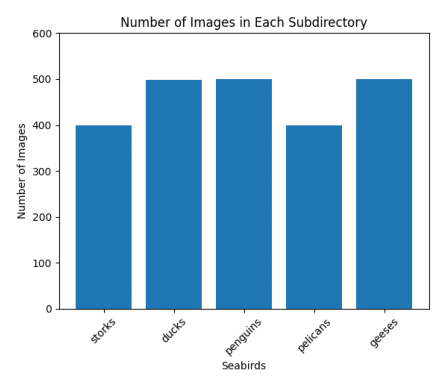

In [53]:
import os
import matplotlib.pyplot as plt

# Set the path to the "Seabirds" directory
seabirds_dir = 'SeaBirds'

# Get a list of subdirectories in the "Seabirds" directory
subdirectories = [name for name in os.listdir(
    seabirds_dir) if os.path.isdir(os.path.join(seabirds_dir, name))]

# Count the number of images in each subdirectory
image_counts = {}
for subdir in subdirectories:
    subdir_path = os.path.join(seabirds_dir, subdir)
    image_files = [name for name in os.listdir(
        subdir_path) if os.path.isfile(os.path.join(subdir_path, name))]
    image_counts[subdir] = len(image_files)


#display image "eda_count" in eda_images
image_path = 'eda_images/eda_count.png'
img = plt.imread(image_path)
plt.imshow(img)
plt.axis('off')
plt.show()

### Balancing the data

Looking at the data, we can see that the categories are not balanced, some searbirds have 500 images while some have 400. We will have to balance the data before training the model to prevent the model from being biased towards the categories with more images.

Pelicans = 400
Ducks = 400
Storks = 400
Penguins = 400
Geeses = 400


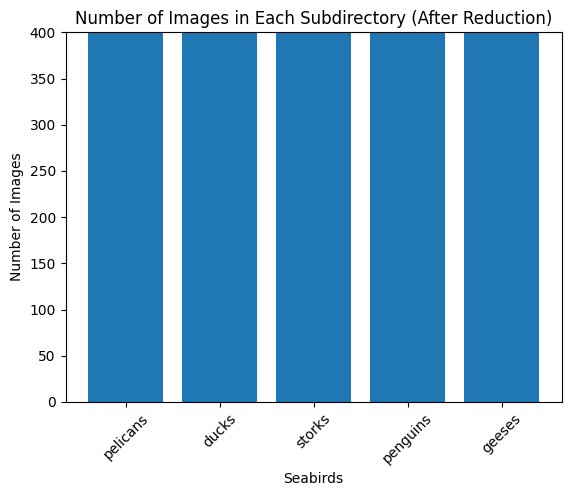

In [54]:
# Determine the target number of images (the lowest count among all categories)
target_count = min(image_counts.values())

# Identify categories with counts exceeding the target
excess_categories = [subdir for subdir,
                     count in image_counts.items() if count > target_count]

# Reduce the number of images for categories with more than the target count
for subdir in excess_categories:
    subdir_path = os.path.join(seabirds_dir, subdir)
    images_to_keep = random.sample(os.listdir(subdir_path), target_count)

    # Move the selected images to a temporary directory
    temp_dir = './temp'
    os.makedirs(temp_dir, exist_ok=True)
    for image in images_to_keep:
        shutil.move(os.path.join(subdir_path, image),
                    os.path.join(temp_dir, image))

    # Remove the remaining images in the original directory
    for image in os.listdir(subdir_path):
        os.remove(os.path.join(subdir_path, image))

    # Move the selected images back to the original directory
    for image in os.listdir(temp_dir):
        shutil.move(os.path.join(temp_dir, image),
                    os.path.join(subdir_path, image))

    # Remove the temporary directory
    os.rmdir(temp_dir)

# Print the subdirectory names and the number of images in each after reduction
image_counts_after_reduction = {subdir: len(os.listdir(
    os.path.join(seabirds_dir, subdir))) for subdir in subdirectories}
for subdir, count in image_counts_after_reduction.items():
    print(f"{subdir.capitalize()} = {count}")

# Create a bar chart to visualize the image counts after reduction
plt.bar(image_counts_after_reduction.keys(),
        image_counts_after_reduction.values())
plt.xlabel('Seabirds')
plt.ylabel('Number of Images')
plt.title('Number of Images in Each Subdirectory (After Reduction)')
plt.xticks(rotation=45)
plt.ylim(0, target_count)  # Set the y-axis limit to the target count
plt.show()

 We categorize and count images of seabirds based on their file sizes across different subdirectories. we then define a function to categorize images into 'small', 'medium', or 'large' based on file size. The code then loops through subdirectories, categorizes and counts images, and prints the results. Finally, it creates a bar chart using matplotlib to visually represent the image counts for each size category and subdirectory.

Category: Small
Pelicans = 0
Ducks = 0
Storks = 0
Penguins = 0
Geeses = 0
Category: Medium
Pelicans = 9
Ducks = 13
Storks = 15
Penguins = 7
Geeses = 20
Category: Large
Pelicans = 391
Ducks = 387
Storks = 385
Penguins = 393
Geeses = 380


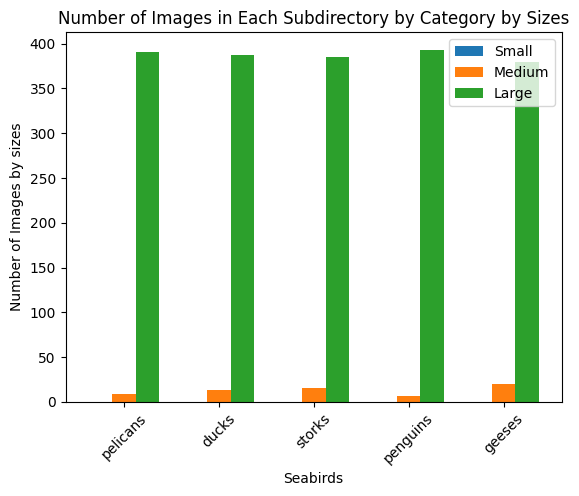

In [55]:
import os
import random
import shutil
import matplotlib.pyplot as plt

# Function to categorize image sizes into small, medium, and large


def categorize_image_size(image_path):
    image_size = os.path.getsize(image_path)
    if image_size < 10000:  # Adjust the threshold for 'small'
        return 'small'
    elif 10000 <= image_size < 50000:  # Adjust the thresholds for 'medium'
        return 'medium'
    else:
        return 'large'


# Define the categories
categories = ['small', 'medium', 'large']

# Dictionary to store image counts for each category
image_counts_by_category = {category: {
    subdir: 0 for subdir in subdirectories} for category in categories}

# Loop through each subdirectory
for subdir in subdirectories:
    subdir_path = os.path.join(seabirds_dir, subdir)

    # Loop through each image in the subdirectory
    for image in os.listdir(subdir_path):
        image_path = os.path.join(subdir_path, image)

        # Categorize the image size
        size_category = categorize_image_size(image_path)

        # Increment the count for the corresponding category and subdirectory
        image_counts_by_category[size_category][subdir] += 1

# Print the image counts for each category and subdirectory
for category in categories:
    print(f"Category: {category.capitalize()}")
    for subdir, count in image_counts_by_category[category].items():
        print(f"{subdir.capitalize()} = {count}")

# Rest of the original code for image reduction and plotting
# ...

# Create a bar chart to visualize the image counts for each category
bar_width = 0.25
bar_positions = range(len(subdirectories))

for i, category in enumerate(categories):
    counts = [image_counts_by_category[category][subdir]
              for subdir in subdirectories]
    plt.bar([pos + i * bar_width for pos in bar_positions],
            counts, width=bar_width, label=category.capitalize())

plt.xlabel('Seabirds')
plt.ylabel('Number of Images by sizes')
plt.title('Number of Images in Each Subdirectory by Category by Sizes')
plt.xticks([pos + (len(categories) - 1) * bar_width /
           2 for pos in bar_positions], subdirectories, rotation=45)
plt.legend()
plt.show()

# **A.2 Modelling Using Fastai**

The fast book is imported and set up


In [ ]:
# This line uses the exclamation mark (!) to run a shell command from within a Jupyter notebook or an IPython environment.
!pip install -Uqq fastbook
# : Similar to the first line, this installs the scikit-learn library using the pip package manager.
!pip install scikit-learn
# imports the fastbook module into the Python
import fastbook
# : This line calls the setup_book function from the fastbook module. T
fastbook.setup_book()
#  Similar to the first line, this installs or upgrades the fastai library using the pip package manager.
!pip install -Uqq fastai


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 25.2 MB/s eta 0:00:00
Mounted at /content/gdrive


In [ ]:
# This line imports all the symbols (functions, classes, etc.) from the fastbook package.
from fastbook import *
# This line imports all symbols from the fastai.vision.widgets module. In this case, it specifically imports widgets related to computer vision tasks.
from fastai.vision.widgets import *


Next we unzip the zip file containing the sea birds

In [ ]:
!unzip SeaBirdsData.zip

Now I try to pull up an image of a duck, just to see if it is there in the directory

In [ ]:
# If you want to use option2:
path = '/content/SeaBirds/'

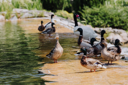

In [ ]:
from PIL import Image

im = Image.open(path + 'ducks/duck1_0.jpeg')
# This line resizes the image to a thumbnail version with a size of 128x128 pixels. The to_thumb() method is a convenience method in Pillow that resizes the image while preserving its aspect ratio
im.to_thumb(128,128)

The variable *filenames* is made that contains a listing of all paths to all files in the birds folder

In [ ]:
from fastai.vision.all import *
filenames = get_image_files(path)
filenames

(#2000) [Path('/content/SeaBirds/pelicans/pelican2_96.jpeg'),Path('/content/SeaBirds/pelicans/pelican3_91.jpeg'),Path('/content/SeaBirds/pelicans/pelican1_61.jpeg'),Path('/content/SeaBirds/pelicans/pelican4_68.jpeg'),Path('/content/SeaBirds/pelicans/pelican3_8.jpeg'),Path('/content/SeaBirds/pelicans/pelican2_78.jpeg'),Path('/content/SeaBirds/pelicans/pelican2_55.jpeg'),Path('/content/SeaBirds/pelicans/pelican4_57.jpeg'),Path('/content/SeaBirds/pelicans/pelican1_99.jpeg'),Path('/content/SeaBirds/pelicans/pelican3_21.jpeg')...]

All images are checked, to make sure none of them are corrupt files:

In [ ]:
# function to retrieve a list of file paths for image files in the specified directory, which is represented by the variable path. The get_image_files function is a utility function in fastai that scans a directory recursively and returns a list of file paths for all the image files it finds
failed = verify_images(filenames)
failed

(#0) []

# **A.2.1**

Next I use a wrapper class from Fastai, Dataloaders, which wrapped around our images from training and validation which enables other fastai

###Dataloader creation
  With our dataloader created, we specified the types of data blocks to use, this being an ImageBlock for handling image data and a CategoryBlock for handling categorical labels.

Next we defined how to get the items (file paths) for the dataset by using the get_image_files function, which retrieves image files from a given directory.A RandomSplitter is used to randomly split the data into training and validation sets.

20% of the data will be used for validation, and seed=42 ensures that it is can be reproduced.

We then used the parent_label function to get the label based on the parent directory of each image.

Item transformations are then applied to the data. it resizes each image to a square of size 128x128 using the Resize transformation and randomizes the cropping.

In [ ]:
# creates an instance of the DataBlock class and assigns it to the variable seaBirdsDls. This DataBlock will be used to organize and process data for training a model
seaBirdsDls = DataBlock(
    # Specifies the types of data the DataBlock will handle. In this case, it's a tuple of two blocks: ImageBlock for handling image data and CategoryBlock for handling categorical labels (e.g., categories/classes
    blocks=(ImageBlock, CategoryBlock),
    # Specifies a function (get_image_files) to obtain a list of items (in this case, file paths to image files) that the DataBlock will work with. The get_image_files function is used to automatically grab image files from a specified directory.
    get_items=get_image_files,
    #  Defines a data split strategy. It uses RandomSplitter to randomly split the data into training and validation sets. The valid_pct=0.2 parameter specifies that 20% of the data will be used for validation
    # The seed parameter allows you to set a specific value (in this case, 42) for the random number generator. When you set a seed, the sequence of random numbers generated will be the same every time you run the code
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    #  Specifies a function (parent_label) to obtain the labels (categories) for the items. In this case, it assumes that the items are images organized in folders, and the folder name is the label
    get_y=parent_label,
    #  a transformation that randomly crops and resizes the input images to a size of 128x128 pixels, with a minimum scale of 0.3.
    item_tfms=RandomResizedCrop(128, min_scale=0.3))


Now we have our custom DataLoader template for our SeaBirds. Next we give our dls the path to where it can find the sea birds images.

In [ ]:
dls = seaBirdsDls.dataloaders(path)
# seaBirdsDls is the DataBlock instance that you defined earlier. It contains all the information about how to organize and process your data
# .dataloaders(path): This method call on the DataBlock generates a DataLoaders object. It takes a path as an argument, indicating where your data is located
# path: This is the directory path where your dataset is stored. The dataloaders method will use the information specified in seaBirdsDls to organize and load the data from this path.

Then we check if we can access our sea birds

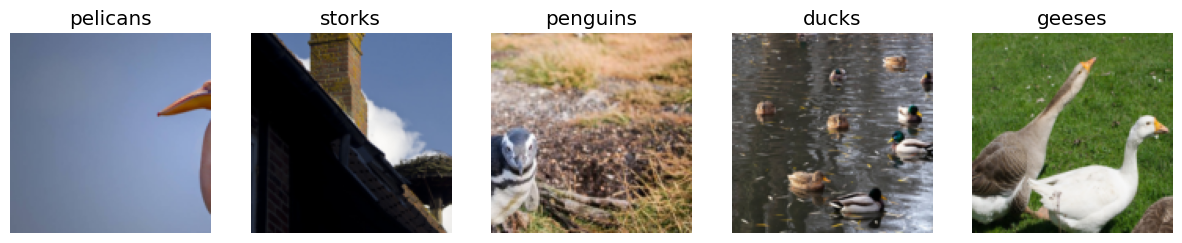

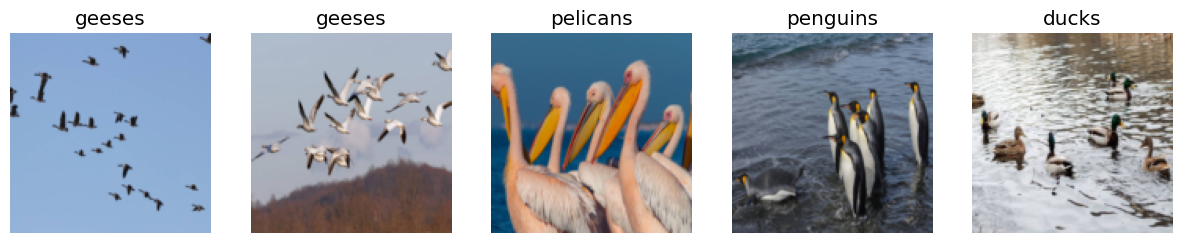

In [ ]:
dls.train.show_batch(max_n=5, nrows=1)
# dls.train: This accesses the training dataloader within the DataLoaders object (dls).
# .show_batch(max_n=5, nrows=1): This method displays a batch of images from the training dataset.
# max_n=5: Specifies the maximum number of images to display in the batch (in this case, 5 images).
# nrows=1: Specifies the number of rows in the display (in this case, 1 row).
dls.valid.show_batch(max_n=5, nrows=1)

<h2>First Model</h2>
This model uses the vgg16_bn architecture,
a learner is set up with the architecture, a DataLoader (dls), and an error rate metric,
After creation, the model is then fine-tuned for 2 additional epochs, adapting it to our dataset

In [ ]:
vgg16_model = vision_learner(dls, vgg16_bn, metrics=error_rate)
vgg16_model.fine_tune(2)

Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to /root/.cache/torch/hub/checkpoints/vgg16_bn-6c64b313.pth
100%|██████████| 528M/528M [00:08<00:00, 61.8MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.423590,0.249228,0.085000,00:25


epoch,train_loss,valid_loss,error_rate,time
0,0.368297,0.140913,0.050000,00:21
1,0.264737,0.136113,0.055000,00:14


These are good numbers for the confusion matrix, the true positives for the different categories are much higher than other numbers.

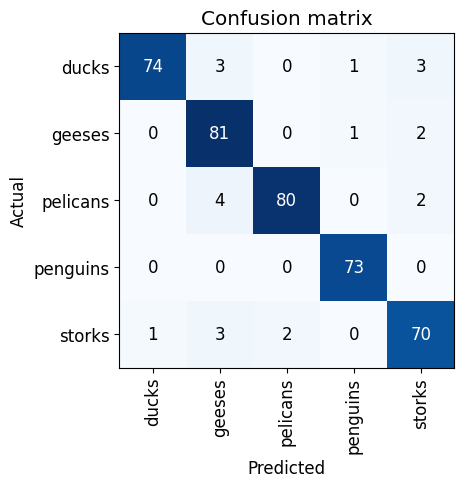

In [ ]:
interp = ClassificationInterpretation.from_learner(vgg16_model)
interp.plot_confusion_matrix()

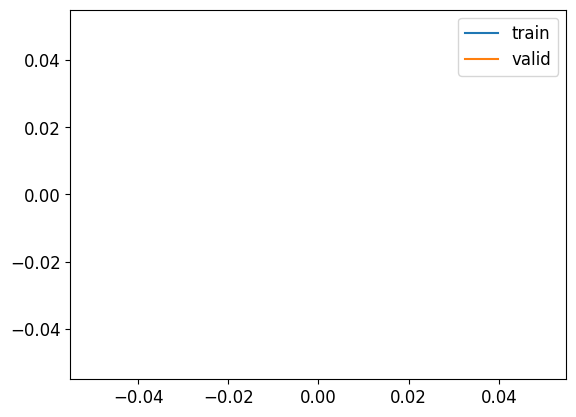

In [ ]:
vgg16_model.recorder.plot_loss()

As you can tell in the learning rate chart, the loss is pretty low, about 0.16 with a learning rate of around 10-3.5

SuggestedLRs(valley=0.0002754228771664202)

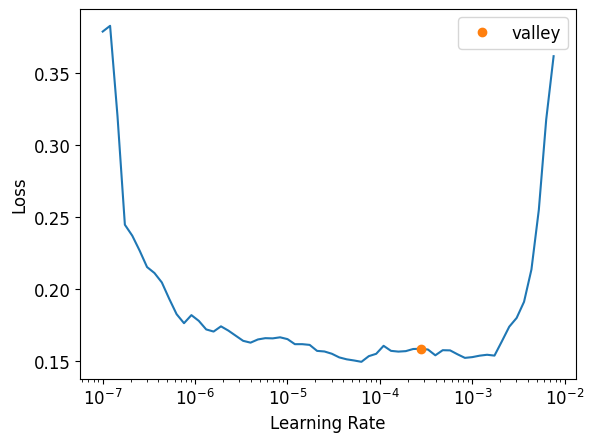

In [ ]:
vgg16_model.lr_find()

In [ ]:
# saving our model, by default in a folder called 'models'.
vgg16_model.save('first_model')
#creating a serialized pickle object of our model, the export.pkl file
export_file_name = 'first_model.pkl'
vgg16_model.export(export_file_name)


Below, a prediction is made on a duck which shows a probability of about 80%/.

Prediction: ducks, Probability: 0.8067


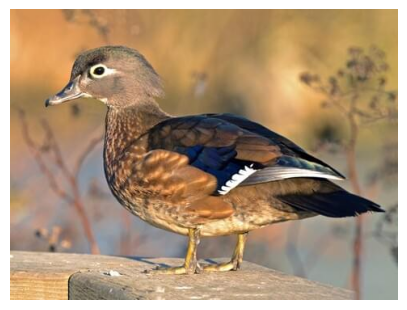

In [ ]:
from fastai.vision.all import *

img = PILImage.create('/content/CustomPredict/duckpredict.jpg')
img.show()

# Make a prediction
pred, pred_idx, probs = vgg16_model.predict(img)
print(f"Prediction: {vgg16_model.dls.vocab[pred_idx]}, Probability: {probs[pred_idx]:.4f}")

# **A.2.2**
<h2>Second Model</h2>


In  this model some advanced learning options are applied, '**to_fp16( )**' uses mixed precision learning which allows faster training with reduced memory requirements. When the model is created, fine-tuning is performed which is a form of transfer learning, in here we freeze the early layers of the model for 3 epochs and train the later layers for 6 epochs.

In [ ]:
from fastai.callback.fp16 import *
vgg16_adv_tweaked = vision_learner(dls, vgg16_bn, metrics=error_rate).to_fp16()
vgg16_adv_tweaked.fine_tune(6, freeze_epochs=3)

epoch,train_loss,valid_loss,error_rate,time
0,2.001972,0.620229,0.212500,00:13
1,1.106990,0.212208,0.085000,00:13
2,0.717119,0.198871,0.075000,00:13


epoch,train_loss,valid_loss,error_rate,time
0,0.256526,0.147048,0.055000,00:12
1,0.238112,0.169688,0.062500,00:11
2,0.181688,0.110687,0.035000,00:13
3,0.136661,0.112002,0.032500,00:13
4,0.101090,0.095219,0.025000,00:14
5,0.074534,0.096666,0.027500,00:11


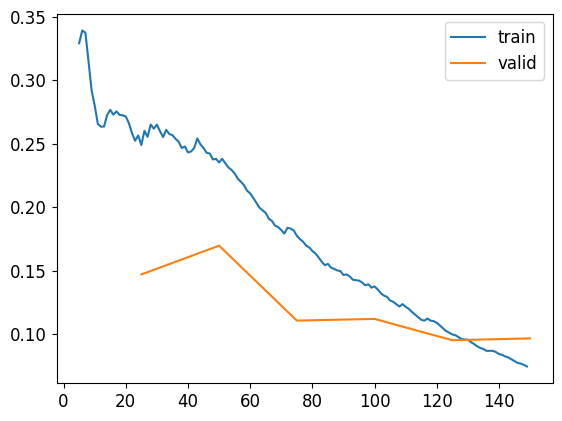

In [ ]:
vgg16_adv_tweaked.recorder.plot_loss()

This initializes a VGG16-based vision learner, applies data augmentation transformations, and fine-tunes the model using mixed-precision training for a total of 6 epochs with freezing.

In [ ]:


vgg16_adv_tweaked = vision_learner(dls, vgg16_bn, metrics=error_rate).to_fp16()
tfms = aug_transforms()
dls.after_batch(tfms)
vgg16_adv_tweaked.fine_tune(6, freeze_epochs=3)




epoch,train_loss,valid_loss,error_rate,time
0,1.949046,0.577070,0.182500,00:11
1,1.073779,0.195707,0.062500,00:13
2,0.714942,0.145275,0.052500,00:12


epoch,train_loss,valid_loss,error_rate,time
0,0.259775,0.160921,0.052500,00:11
1,0.208925,0.100203,0.035000,00:13
2,0.179363,0.125322,0.032500,00:13
3,0.145657,0.143799,0.042500,00:12
4,0.111239,0.104641,0.035000,00:11
5,0.081214,0.106406,0.035000,00:13


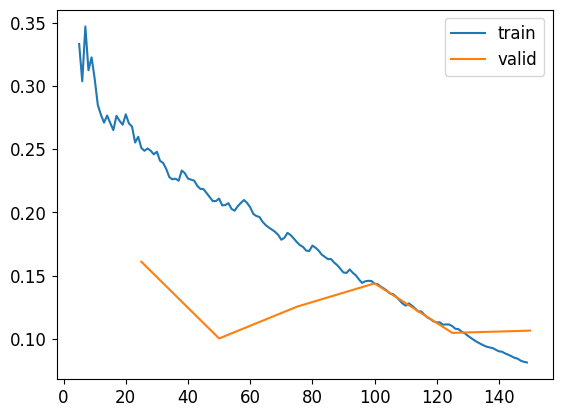

In [ ]:
vgg16_adv_tweaked.recorder.plot_loss()

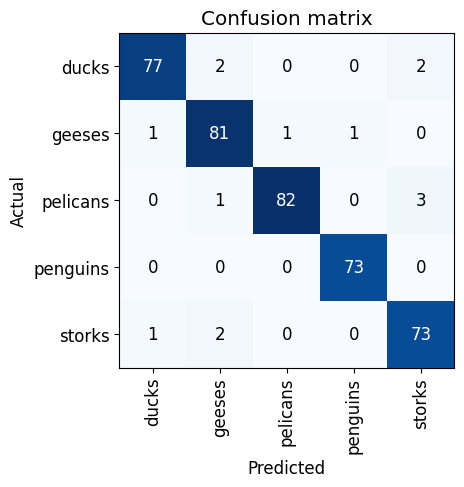

In [ ]:
interp = ClassificationInterpretation.from_learner(vgg16_adv_tweaked)
interp.plot_confusion_matrix()

SuggestedLRs(valley=1.4454397387453355e-05)

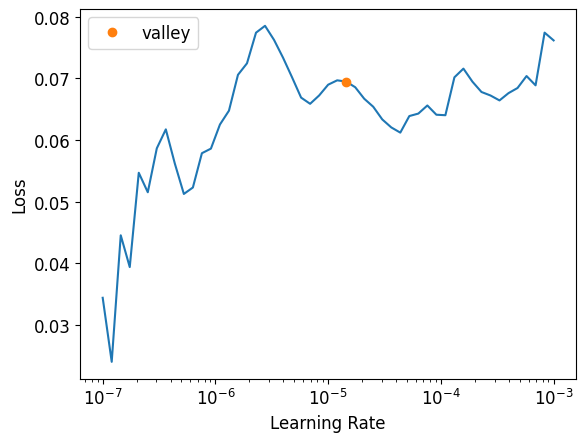

In [ ]:
vgg16_adv_tweaked.lr_find()

In [ ]:
# saving our model, by default in a folder called 'models'.
vgg16_adv_tweaked.save('second_model')
#creating an serialized pickle object of our model, the export.pkl file
export_file_name = 'second_model.pkl'
#creating an serialized pickle object of our model, the export.pkl file
vgg16_adv_tweaked.export(export_file_name)


Prediction: ducks, Probability: 0.9220


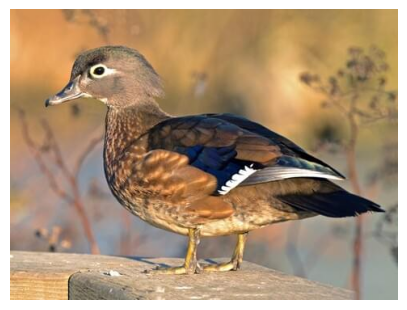

In [ ]:
from fastai.vision.all import *

img = PILImage.create('/content/CustomPredict/duckpredict.jpg')
img.show()

# Make a prediction
pred, pred_idx, probs = vgg16_adv_tweaked.predict(img)
print(f"Prediction: {vgg16_adv_tweaked.dls.vocab[pred_idx]}, Probability: {probs[pred_idx]:.4f}")

Comparing with Google

In [ ]:
from keras.models import load_model  # TensorFlow is required for Keras to work
from PIL import Image, ImageOps  # Install pillow instead of PIL
import numpy as np

# Disable scientific notation for clarity
np.set_printoptions(suppress=True)

# Load the model
model = load_model("/content/GooglesModel/keras_model.h5", compile=False)

# Load the labels
class_names = open("/content/GooglesModel/labels.txt", "r").readlines()

# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

# Replace this with the path to your image
image = Image.open("/content/CustomPredict/duckpredict.jpg").convert("RGB")

# resizing the image to be at least 224x224 and then cropping from the center
size = (224, 224)
image = ImageOps.fit(image, size, Image.Resampling.LANCZOS)

# turn the image into a numpy array
image_array = np.asarray(image)

# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1

# Load the image into the array
data[0] = normalized_image_array

# Predicts the model
prediction = model.predict(data)
index = np.argmax(prediction)
class_name = class_names[index]
confidence_score = prediction[0][index]

# Print prediction and confidence score
print("Class:", class_name[2:], end="")
print("Confidence Score:", confidence_score)


1/1 [==============================] - 2s 2s/step
Class: Duck
Confidence Score: 0.9978974


<Axes: >

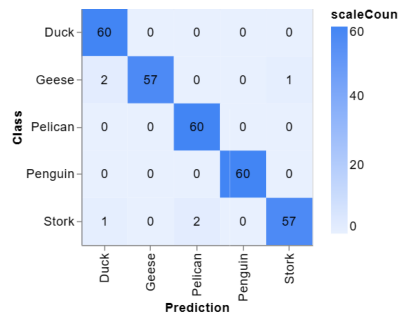

In [58]:
#show image google confusion matrix
from fastai.vision.all import *

img = PILImage.create('/content/googleconfusionmatrix.png')
img.show()

In [ ]:
#Accuracy per class

<Axes: >

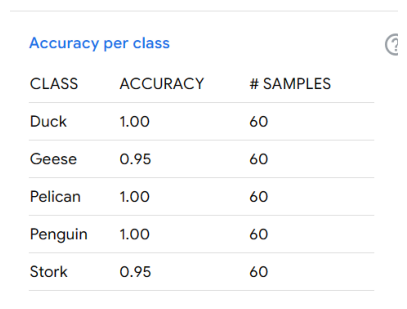

In [59]:
img = PILImage.create('/content/googleaccuracyperclass.png')
img.show()


### In conclusion

Comparing the charts to each other we can conclude that our second model did better than the first due to it having more true positives and a lower loss to learning rate.
Google's model performed better overall despite the tweaking to our second model, it has near perfect accuracy for all classes and higher percentage of true positives.


### Part B: Natural Language Processing:

#### B.1 Toxic Dataset EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Use pandas to read the csv file and then use the `head()` method to display the first 10 rows of the dataframe.


In [2]:
data = pd.read_csv("train.csv")
data.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


Check for null values, data types of each column and some basic statistics of the dataframe.

In [3]:
# Read the CSV file
file_path = 'train.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
print(df.head())

# Get summary statistics of the numerical columns
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Check the data types of each column
print(df.dtypes)



                 id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0              0  
1             0        0       0       0              0  
2             0        0       0       0              0  
3             0        0       0       0              0  
4             0        0       0       0              0  
               toxic   severe_toxic        obscene         threat  \
count  159571.000000  159571.000000  159571.000000  159571.000000   
mean        0.095844       

Visualize the distribution of the labels using a bar chart.

Distribution of toxic labels:
toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64


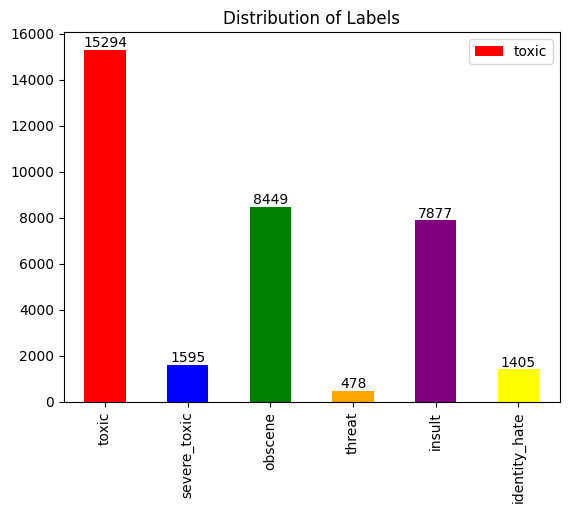

In [4]:
# Check the distribution of toxic labels
toxic_labels = ['toxic', 'severe_toxic',
                'obscene', 'threat', 'insult', 'identity_hate']
toxic_distribution = df[toxic_labels].sum()

print("Distribution of toxic labels:")
print(toxic_distribution)

# Assign colors to each label
colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow']

# Visualize the distribution of toxic labels
ax = toxic_distribution.plot(
    kind='bar', title='Distribution of Labels', color=colors)

# Add exact numbers on top of each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() /
                2, p.get_height()), ha='center', va='bottom')

# Add a legend
plt.legend(toxic_labels)

plt.show()

Since we would be doing single-label classificaton, we would visualize all toxic data versus the other label and cal them non-toxic.

Class Distribution:
0    144277
1     15294
Name: toxic, dtype: int64


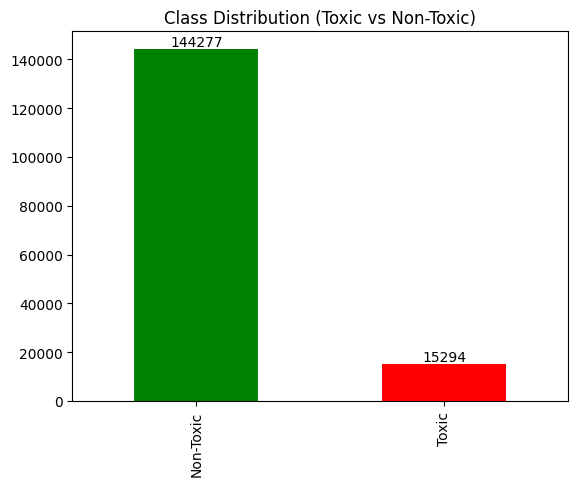

In [5]:
class_distribution = df['toxic'].value_counts()
print("Class Distribution:")
print(class_distribution)

# Assign labels and colors
labels = ['Non-Toxic', 'Toxic']
colors = ['green', 'red']

# Visualize the class distribution
ax = class_distribution.plot(
    kind='bar', title='Class Distribution (Toxic vs Non-Toxic)', color=colors)
ax.set_xticklabels(labels)  # Set x-axis labels

# Add exact numbers on top of each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()

Drop the remaing colomns and keep only the toxic columns

In [6]:
toxic_data = data.drop(
    columns=['severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate'])
toxic_data

,id,comment_text,toxic
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0
...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0


#### B.2 Text processing and Model Training

In [ ]:
!pip install transformers datasets sentencepiece evaluate bertviz

In [ ]:
!pip install transformers[torch]

Dataset is uploaded

In [ ]:
#pip install ipywidgets
from google.colab import files
uploaded = files.upload()


In [9]:
!pip install pandas

In [10]:
import pandas  as pd

The CSV is loaded into a data frame

In [11]:
data = pd.read_csv("train.csv")
data.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [12]:
data.groupby("toxic").describe()

severe_toxic                                                obscene  \
             count      mean       std  min  25%  50%  75%  max     count   
toxic                                                                       
0         144277.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  144277.0   
1          15294.0  0.104289  0.305645  0.0  0.0  0.0  0.0  1.0   15294.0   

                 ... insult      identity_hate                                \
           mean  ...    75%  max         count      mean       std  min  25%   
toxic            ...                                                           
0      0.003625  ...    0.0  1.0      144277.0  0.000714  0.026710  0.0  0.0   
1      0.518242  ...    1.0  1.0       15294.0  0.085131  0.279086  0.0  0.0   

                      
       50%  75%  max  
toxic                 
0      0.0  0.0  1.0  
1      0.0  0.0  1.0  

[2 rows x 40 columns]

In [13]:
toxic_data = data.drop(columns=['severe_toxic','obscene','threat','insult','identity_hate'])
toxic_data

,id,comment_text,toxic
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0
...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0


The toxic column is renamed into "label"

In [14]:
toxic_data = toxic_data.rename(columns={"toxic": "label"})
toxic_data.head(15)

,id,comment_text,label
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0
9,00040093b2687caa,alignment on this subject and which are contra...,0


In [15]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

#from sklearn.model_selection import train_test_split
# Hugging Face
from datasets import Dataset, load_dataset
from transformers import AutoModel, AutoTokenizer, utils
utils.logging.set_verbosity_error()  # Suppress standard warnings

from transformers import TrainingArguments, Trainer
from transformers import AutoModelForSequenceClassification, AutoTokenizer


In [16]:
!pip install datasets


#### Loading the data & cleaning

The Dataset class is used to create a dataset *ds* from a subset of columns ('id', 'comment_text', 'label') in a Pandas DataFrame that we call toxic_data

In [17]:
ds = Dataset.from_pandas(toxic_data[['id','comment_text', 'label']])



In [18]:
ds

Dataset({
    features: ['id', 'comment_text', 'label'],
    num_rows: 159571
})


Two dictionaries, id2label and label2id is used to establish a mapping between numeric labels and their corresponding text representations which is Toxic or Not Toxic. The id2label dictionary maps numeric labels (0 and 1) to descriptive text labels ("Not Toxic" and "Toxic"). The label2id dictionary performs the reverse mapping i.e goes the opposite way, associating text labels with their corresponding numbers.

In [19]:
id2label = { 0:"Not Toxic",1: "Toxic"}
label2id = {"Not Toxic":0,"Toxic":1}
# These mappings are commonly used in machine learning tasks for converting between label representations during model training and evaluation.

#### Tokenization


We set the pretrained_model to be 'distilbert-base-cased'

In [20]:
pretrained_model = 'distilbert-base-cased' #'distilbert-base-uncased' is better, but larger/heavier on GPU


We initialize a tokenizer (tokenizer) using the Hugging Face Transformers library. It employs the AutoTokenizer.from_pretrained method to load a pre-trained tokenizer for a specified model (pretrained_model). The use_fast=True parameter indicates the use of a fast tokenizer implementation

In [21]:
tokenizer = AutoTokenizer.from_pretrained(pretrained_model, use_fast =True)

tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/465 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

 We tokenize the "comment_text" column of the input row, considering truncation with a maximum length of 128 tokens.

In [22]:
def preprocess(x):
    return tokenizer(x["comment_text"], truncation=True, max_length=128)

The map method is used to apply the preprocess function to each batch in the dataset ds. The preprocess function tokenizes the "comment_text" column of each row in the dataset using the initialized tokenizer.

The batched=True parameter indicates that the tokenization is performed in batches, which can be more efficient than processing individual examples.

In [23]:
tok_ds = ds.map(preprocess, batched=True)
tok_ds

Map:   0%|          | 0/159571 [00:00<?, ? examples/s]

Dataset({
    features: ['id', 'comment_text', 'label', 'input_ids', 'attention_mask'],
    num_rows: 159571
})

The tokenizer is passed to the DataCollatorWithPadding.
'max_length' Indicates that padding should be applied to the sequences in each batch to match the maximum length of the longest sequence in the batch. Padding is essential when training models on batches of sequences with varying lengths.

In [24]:
from transformers import DataCollatorWithPadding
data_collator = DataCollatorWithPadding(tokenizer=tokenizer, padding='max_length')

#### Train, Test/Validation Set

In [25]:
# Split the dataset into train and valid sets (here we use 70/30 split)
dataset = tok_ds.train_test_split(test_size=0.3)

In [26]:
dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'comment_text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 111699
    })
    test: Dataset({
        features: ['id', 'comment_text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 47872
    })
})

In [27]:
tok_train_dataset = dataset["train"]
tok_test_dataset = dataset["test"]

#### Evaluation Metrics

In [28]:
import evaluate
accuracy = evaluate.load("accuracy")

This function takes evaluation predictions as input, consisting of (predictions) and true labels (toxic). It converts the probabilities to class labels and calculates the accuracy by comparing these predicted labels with the ground truth.

In [29]:
def compute_metrics(eval_pred):
    predictions, toxic= eval_pred
    predictions = np.argmax(predictions, axis=1)
    return accuracy.compute(predictions=predictions, references=toxic)

 We Import the AutoModelForSequenceClassification class, which is designed for sequence classification tasks.
An instance of the sequence classification model is initialized using the from_pretrained method.
pretrained_model: Specifies the pre-trained model to be used.
num_labels=2: Indicates that the model is designed for a binary classification task with two labels.
id2label and label2id: Specify dictionaries mapping label IDs to text labels and vice versa.
output_attentions=True: Indicates that the model should output attention weights during inference.


In [30]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained(pretrained_model, num_labels=2, id2label=id2label, label2id=label2id, output_attentions=True)

model.safetensors:   0%|          | 0.00/263M [00:00<?, ?B/s]

#### Finetune Model

We Specify the directory where training outputs will be saved learning_rate=2e-5 Sets the initial learning rate for the optimizer. warmup_ratio=0.1: Specifies the warm-up ratio for learning rate warm-up. lr_scheduler_type="cosine": Chooses the cosine learning rate scheduler.
fp16=True: Enables mixed-precision training for improved efficiency.
Epochs and Weight Decay:
num_train_epochs=2: Sets the number of training epochs.
weight_decay=0.01: Specifies the weight decay for regularization.

In [31]:
# Define some training arguments
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="./results",
    learning_rate=2e-5,
    warmup_ratio=0.1,
    lr_scheduler_type="cosine",
    fp16=True,
    num_train_epochs=2,
    weight_decay=0.01,

)


The environment is set

In [32]:
import os
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "max_split_size_mb:128"

Thus sets up and executes the training process for the model

In [33]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tok_train_dataset,
    eval_dataset=tok_test_dataset,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

trainer.train()



{'loss': 0.404, 'learning_rate': 3.5732187611886865e-06, 'epoch': 0.04}
{'loss': 0.1745, 'learning_rate': 7.139276763336914e-06, 'epoch': 0.07}
{'loss': 0.1725, 'learning_rate': 1.0719656283566058e-05, 'epoch': 0.11}
{'loss': 0.1645, 'learning_rate': 1.4300035803795203e-05, 'epoch': 0.14}
{'loss': 0.1493, 'learning_rate': 1.7880415324024346e-05, 'epoch': 0.18}
{'loss': 0.1489, 'learning_rate': 1.9996748993115928e-05, 'epoch': 0.21}
{'loss': 0.142, 'learning_rate': 1.9961415555153826e-05, 'epoch': 0.25}
{'loss': 0.1677, 'learning_rate': 1.9887152010585374e-05, 'epoch': 0.29}
{'loss': 0.1464, 'learning_rate': 1.977428014378451e-05, 'epoch': 0.32}
{'loss': 0.1434, 'learning_rate': 1.962324070790237e-05, 'epoch': 0.36}
{'loss': 0.1283, 'learning_rate': 1.9434623496562445e-05, 'epoch': 0.39}
{'loss': 0.1379, 'learning_rate': 1.9209652163709512e-05, 'epoch': 0.43}
{'loss': 0.1427, 'learning_rate': 1.894830380490912e-05, 'epoch': 0.47}
{'loss': 0.1421, 'learning_rate': 1.8652013230558322e-05,

TrainOutput(global_step=27926, training_loss=0.1176525445309886, metrics={'train_runtime': 4810.2664, 'train_samples_per_second': 46.442, 'train_steps_per_second': 5.805, 'train_loss': 0.1176525445309886, 'epoch': 2.0})

In [34]:
trainer.save_model("comment_finetuned")
#saving the trained model

"comment_finetuned": Specifies the path for a pre-trained sequence classification model.
model = AutoModelForSequenceClassification.from_pretrained(model_path): Loads the pre-trained sequence classification model from the specified path using the AutoModelForSequenceClassification class.

Tokenizer Loading:
tokenizer = AutoTokenizer.from_pretrained(model_path): Loads the pre-trained tokenizer corresponding to the model from the same model_path using the AutoTokenizer class.

In [35]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer

model_path = "comment_finetuned"
model = AutoModelForSequenceClassification.from_pretrained(model_path)
tokenizer = AutoTokenizer.from_pretrained(model_path)


#### Inference

Comments that are  toxic or Not toxic to test our model with

In [46]:

first_comment = "you smell like shit please do not come near me idiot"
second_comment = "You smell lovely today"
third_comment = "Wish you best of luck bro"
fourth_comment = "youre the worst player on this team, you are a useless peice of shit"
comments = [first_comment,second_comment,third_comment,fourth_comment]

In [44]:
from transformers import AutoModelForSequenceClassification
import torch

 This code tokenizes comments, uses our model to make predictions, and prints the predicted label for each comment. It ensures that the adjusted index is within the range of labels before printing the result.

In [47]:
for comment in comments:
  tok_test = tokenizer(comment, truncation=True, max_length=128, return_tensors="pt")
  model = AutoModelForSequenceClassification.from_pretrained("comment_finetuned")
  with torch.no_grad():
    logits = model(**tok_test).logits
  predicted_class_id = logits.argmax().item()
# predicted_class_id += 1

# Make sure to check if the adjusted index is within the range of your labels
  if predicted_class_id in model.config.id2label:
      predicted_label = model.config.id2label[predicted_class_id]
      print(f"Predicted label: \"{comment}\" is", predicted_label)
  else:
      print("Invalid label index:", predicted_class_id)



Predicted label: "you smell like shit please do not come near me idiot" is Toxic
Predicted label: "You smell lovely today" is Not Toxic
Predicted label: "Wish you best of luck bro" is Not Toxic
Predicted label: "youre the worst player on this team, you are a useless peice of shit" is Toxic
